In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 5
settings.gamma_range = (2,10)
settings.train_frac = 0.8
settings.RW_exponent = [0]
settings.stride = 1000000
settings.split_mode = "R3"
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full0.5_celeste_stride100_413_5reps_bigEXPrange0
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full0.5_celeste_stride100_413_5reps_bigEXPrange1
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full0.5_celeste_stride100_413_5reps_bigEXPrange2
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full0.5_celeste_stride100_413_5reps_bigEXPrange3
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full0.5_celeste_stride100_413_5reps_bigEXPrange4
Experiment name test_full0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Atte

In [3]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [4]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [5]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [6]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [7]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [8]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


In [9]:
print(VDX.rates)

                                               rates     calc_name
0  {3: 917.89750993, 4: 481.71945087, 5: 5161.716...  Experimental


In [10]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  


In [11]:
SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

dir_list = os.listdir(SHAW_dir)

dcd_list = [i for i in dir_list if i.endswith(".dcd")]
# remove any with small in name
dcd_list = [i for i in dcd_list if not "_str" in i]

dcd_list.sort()
print(dcd_list)
print(len(dcd_list))

['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.dcd', 'bpti-protein-038.dcd', 'bpti-protein-039.dcd', 'bpti-protein-040.dcd', 'bpti-protein-0

In [12]:
sim_name = "BPTI_SHAW"
top_name = "bpti-protein_noalt.pdb"
top_path = os.path.join(SHAW_dir, top_name)
reps = len(dcd_list)
# reps =100

traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
print(top_path)
print(traj_paths)


# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein_noalt.pdb
['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/ale

In [13]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

small_traj_paths = []

for rep in range(len(traj_paths)):
    traj = traj_paths[rep]
    u = mda.Universe(top_path, traj)
    print(u.trajectory.n_frames)

    # sample by stride settings.stide

    small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

    # Create an AtomGroup from the Universe's selection
    ag = u.select_atoms('all')

    # write traj
    with DCDWriter(small_traj_name, ag.n_atoms) as writer:
        for ts in u.trajectory[::settings.stride]:
            writer.write(ag)

    small_traj_paths.append(small_traj_name)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


10000
10000


10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

In [14]:
print((traj_paths))

['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-010.dcd', '/home/al

In [15]:
VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN   

                                                 top  \
0                                                NaN   
1                                                NaN   
2  /home/alexi/Documents/DESRES-Trajectory-bpti-p

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Structures loaded MD_Simulated: 
MD_Simulated Topology: <Universe with 892 atoms>
MD_Simulated Trajectory: <Universe with 892 atoms>
MD_Simulated Traj: no frames 413


In [16]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,Experimental,False,NaN,NaN,NaN
1,NaN,NaN,Experimental,False,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,NaN,NaN
2,NaN,NaN,MD_Simulated,NaN,NaN,/home/alexi/Documents/DESRES-Trajectory-bpti-p...,[/home/alexi/Documents/DESRES-Trajectory-bpti-...


Random seeds: [42]
Splitting segments for MD_Simulated by redundancy mk II
    ResStr  ResEnd  peptide     calc_name ResNums
0        4       5        0  Experimental       4
0        4       5        0  Experimental       5
1        5       6        1  Experimental       5
1        5       6        1  Experimental       6
2        6       7        2  Experimental       6
..     ...     ...      ...           ...     ...
38      53      54       38  Experimental      54
39      54      55       39  Experimental      54
39      54      55       39  Experimental      55
40      55      56       40  Experimental      55
40      55      56       40  Experimental      56

[82 rows x 5 columns]
centrality
1    82
Name: count, dtype: int64
segs_indexes:  [14 39 30 25  6  1 36 28  0 40 33  9  6  8 11 22 18 12 24  5 19 32  7 20
 23  2  7  2 33  4 28 17  5 19  1 36 10 26 13 21 31 37 38  3 12 15 11 34
 15 32  3 39  0 29 30 31  9 20 10 35 27 18  8 22 25 24 23  4 14 27 16 38
 17 26]
segs:      ResS

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str100000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str100000.dcd 

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrang

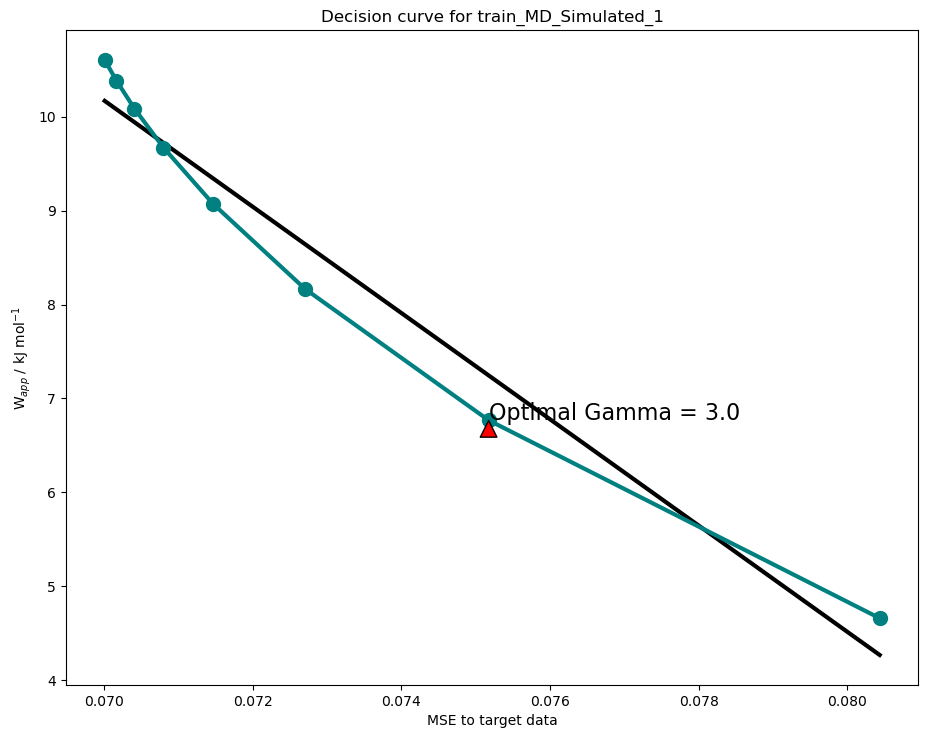

Optimal gamma for train_MD_Simulated_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.15485  0.63484  0.99996    1.0        0
1  0.03104  0.17206  0.84864    1.0        1
2  0.13769  0.58813  0.99986    1.0        2
3  0.14415  0.60627  0.99991    1.0        3
4  0.99475  1.00000  1.00000    1.0        4
      0.167      1.0     10.0    120.0  peptide
0   0.15485  0.63484  0.99996  1.00000        0
1   0.03104  0.17206  0.84864  1.00000        1
2   0.13769  0.58813  0.99986  1.00000        2
3   0.14415  0.60627  0.99991  1.00000        3
4   0.99475  1.00000  1.00000  1.00000        4
5   0.88969  1.00000  1.000

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Recalculating Experimental
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      46      47   

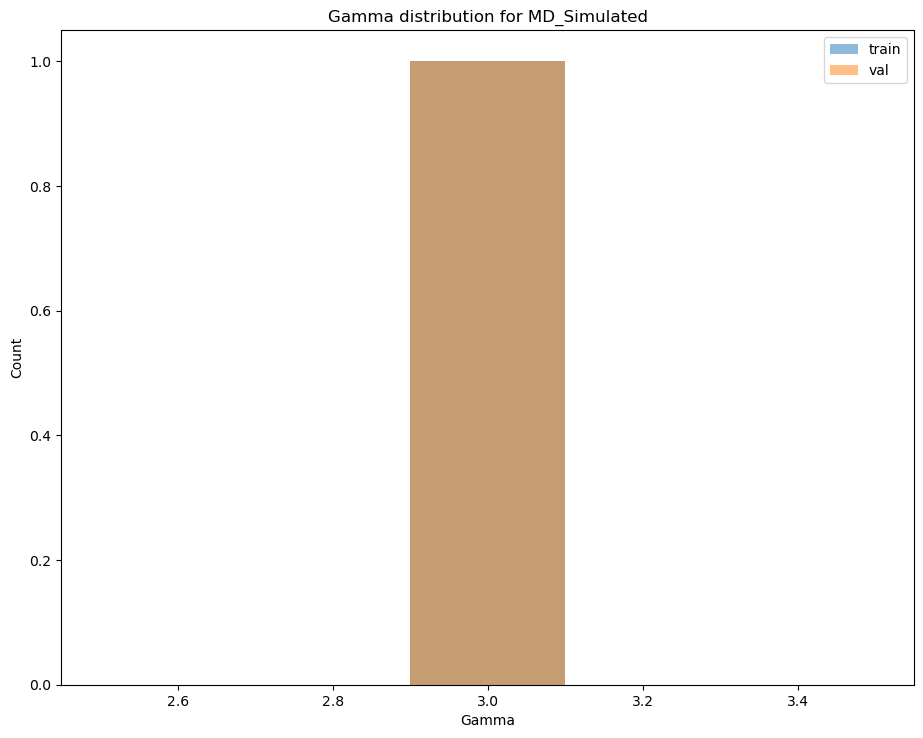

['train_MD_Simulated_1']
['val_MD_Simulated_1']
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000332  0.001987  0.019650  0.206671       36  test_MD_Simulated_1   
119  0.022563  0.121089  0.482256  0.650881       37  test_MD_Simulated_1   
120  0.048668  0.258058  0.947977  1.000000       38  test_MD_Simulated_1   
121  0.026508  0.139384  0.489600  0.599240       39  test_MD_Simulated_1   
122  0.000838  0.005001  0.048464  0.412167       40  test_MD_Simulated_1   

     Re

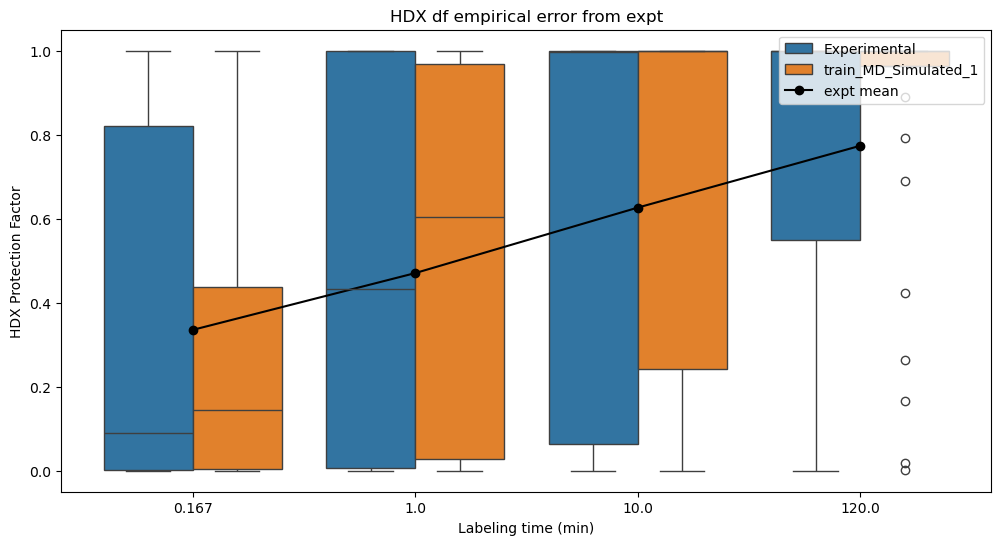

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000332  0.001987  0.019650  0.206671       36  test_MD_Simulated_1   
119  0.022563  0.121089  0.482256  0.650881       37  test_MD_Simulated_1   
120  0.048668  0.258058  0.947977  1.000000       38  test_MD_Simulated_1   
121  0.026508  0.139384  0.489600  0.599240       39  test_MD_Simulated_1   
122  0.000838  0.005001  0.048464  0.412167       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

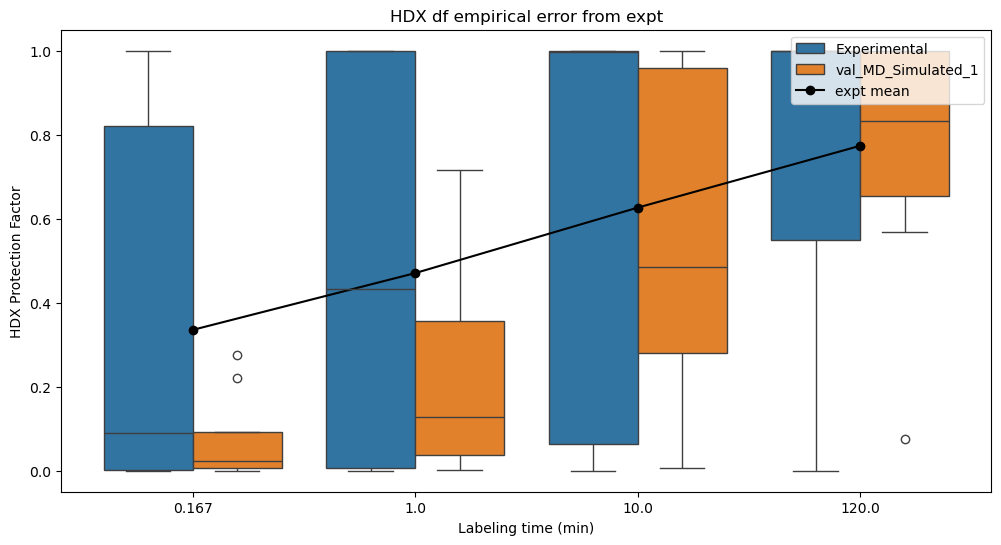

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000332  0.001987  0.019650  0.206671       36  test_MD_Simulated_1   
119  0.022563  0.121089  0.482256  0.650881       37  test_MD_Simulated_1   
120  0.048668  0.258058  0.947977  1.000000       38  test_MD_Simulated_1   
121  0.026508  0.139384  0.489600  0.599240       39  test_MD_Simulated_1   
122  0.000838  0.005001  0.048464  0.412167       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

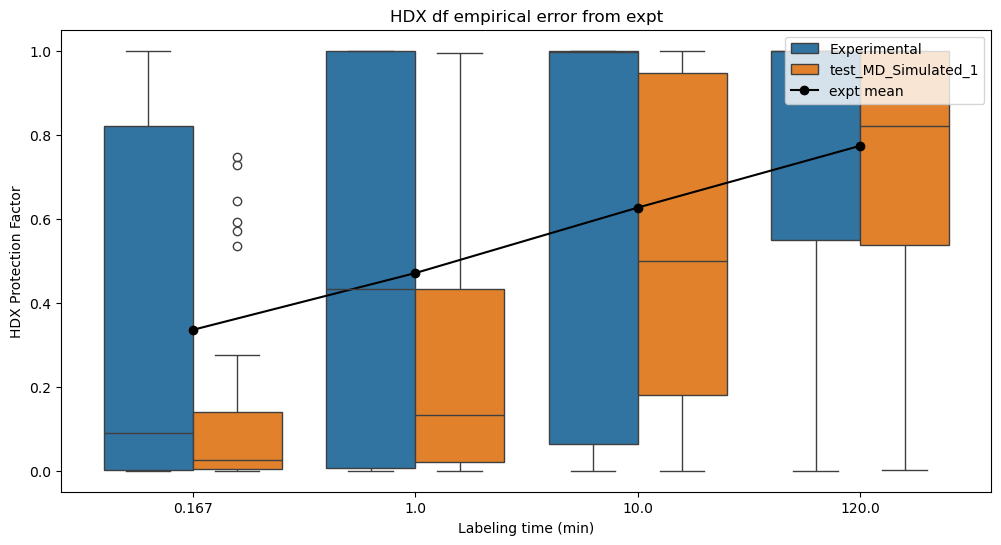

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
test_rep_names ['test_MD_Simulated_1']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 16, 17, 19, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.154850  0.634840  0.999960  1.000000        0  train_MD_Simulated_1   
1   0.031040  0.172060  0.848640  1.000000        1  train_MD_Simulated_1   
2   0.137690  0.588130  0.999860  1.000000        2  train_MD_Simulated_1   
3   0.144150  0.606270  0.999910  1.000000        3  train_MD_Simulated_1   
4   0.994750  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       .

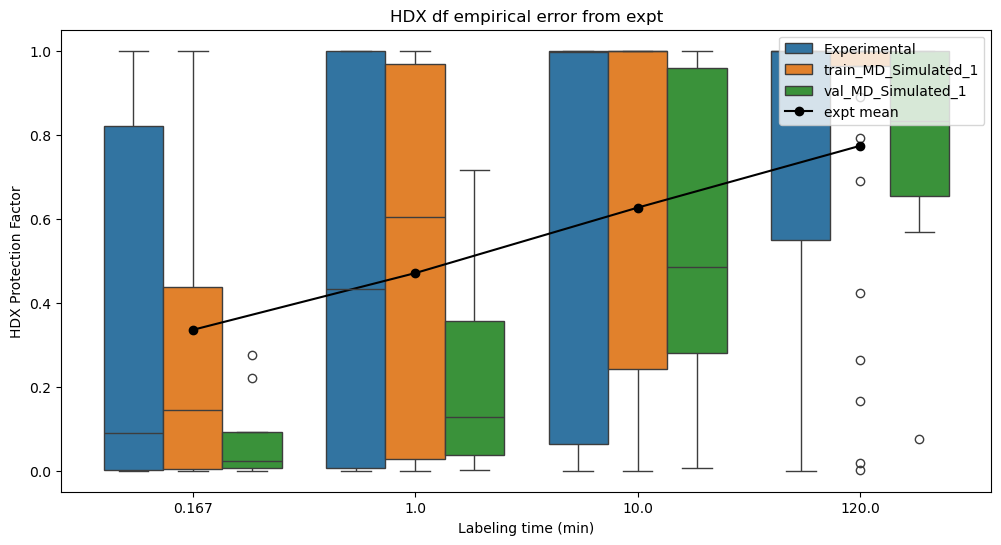

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000332  0.001987  0.019650  0.206671       36  test_MD_Simulated_1   
119  0.022563  0.121089  0.482256  0.650881       37  test_MD_Simulated_1   
120  0.048668  0.258058  0.947977  1.000000       38  test_MD_Simulated_1   
121  0.026508  0.139384  0.489600  0.599240       39  test_MD_Simulated_1   
122  0.000838  0.005001  0.048464  0.412167       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

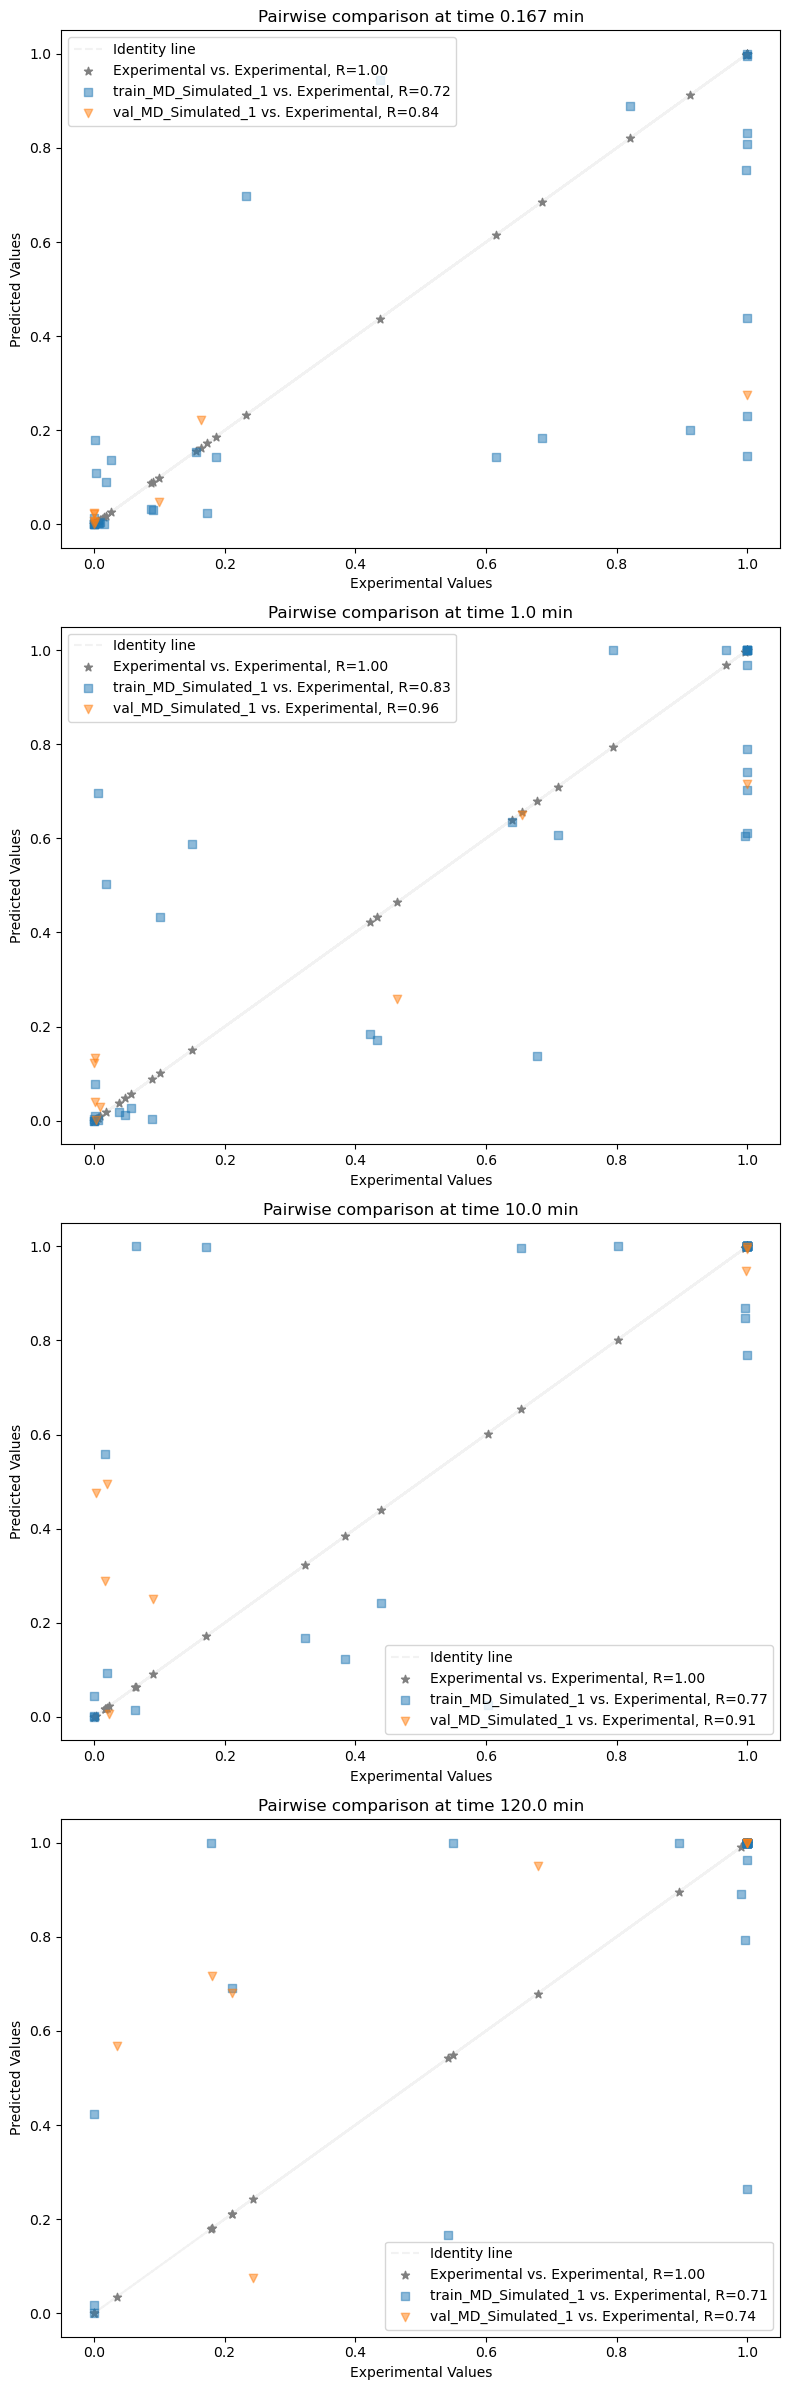

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
118  0.000332  0.001987  0.019650  0.206671       36  test_MD_Simulated_1   
119  0.022563  0.121089  0.482256  0.650881       37  test_MD_Simulated_1   
120  0.048668  0.258058  0.947977  1.000000       38  test_MD_Simulated_1   
121  0.026508  0.139384  0.489600  0.599240       39  test_MD_Simulated_1   
122  0.000838  0.005001  0.048464  0.412167       40  test_MD_Simulated_1   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train_R, str(key):train})], ignore_index=True)


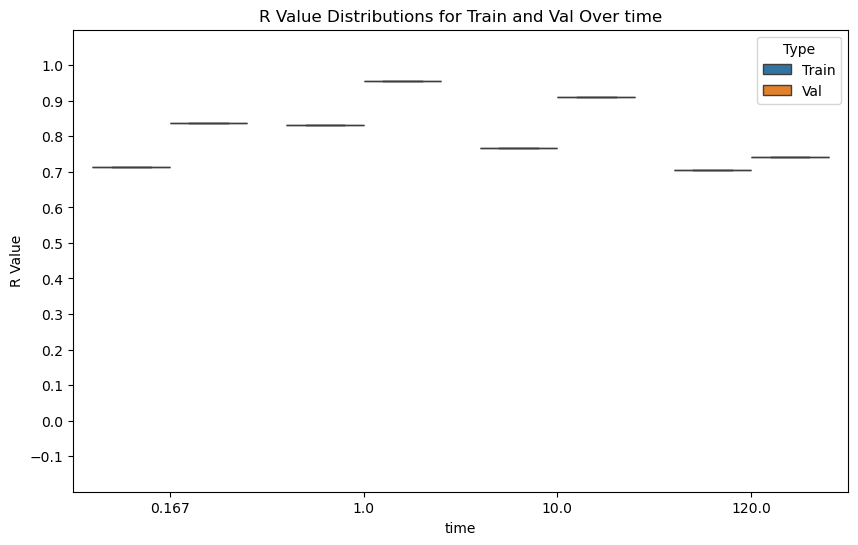

nan_df
       0.167       1.0      10.0     120.0  peptide             calc_name  \
0   0.154850  0.634840  0.999960  1.000000        0  train_MD_Simulated_1   
1   0.031040  0.172060  0.848640  1.000000        1  train_MD_Simulated_1   
2   0.137690  0.588130  0.999860  1.000000        2  train_MD_Simulated_1   
3   0.144150  0.606270  0.999910  1.000000        3  train_MD_Simulated_1   
4   0.994750  1.000000  1.000000  1.000000        4  train_MD_Simulated_1   
..       ...       ...       ...       ...      ...                   ...   
77  0.004856  0.028694  0.249779  0.949688       18    val_MD_Simulated_1   
78  0.006713  0.039020  0.289663  0.717260       20    val_MD_Simulated_1   
79  0.025017  0.132727  0.494375  0.681433       22    val_MD_Simulated_1   
80  0.221762  0.649383  0.994301  1.000000       28    val_MD_Simulated_1   
81  0.048668  0.258058  0.947977  1.000000       38    val_MD_Simulated_1   

    ResStr  ResEnd                                               pat

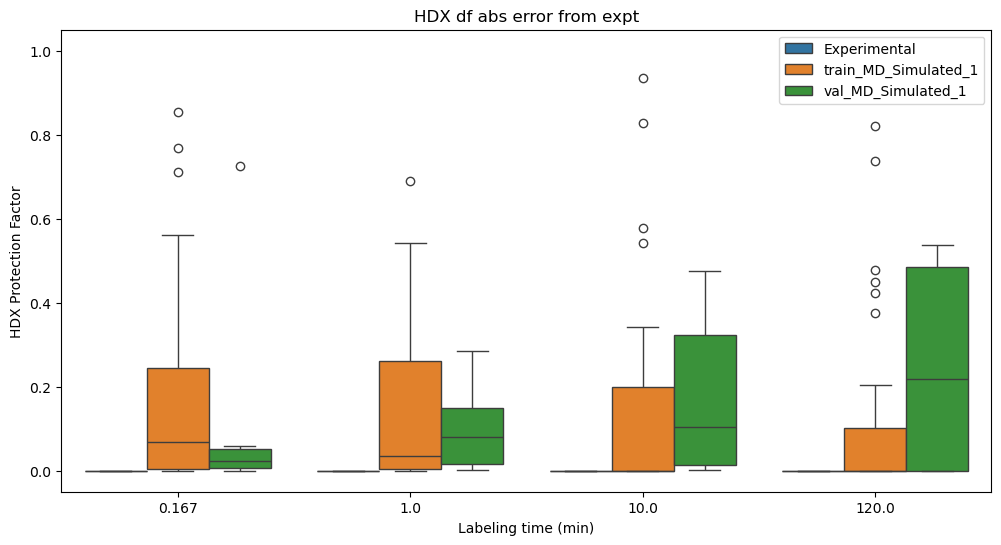

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.15485  0.63484  0.99996  1.00000        0  train_MD_Simulated_1   
1    0.03104  0.17206  0.84864  1.00000        1  train_MD_Simulated_1   
2    0.13769  0.58813  0.99986  1.00000        2  train_MD_Simulated_1   
3    0.14415  0.60627  0.99991  1.00000        3  train_MD_Simulated_1   
4    0.99475  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
118  0.00963  0.05627  0.43963  0.99904       36          Experimental   
119  0.01757  0.10068  0.65396  1.00000       37          Experimental   
120  0.09888  0.46390  0.99804  1.00000       38          Experimental   
121  0.00650  0.03831  0.32339  0.99079       39          Experimental   
122  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

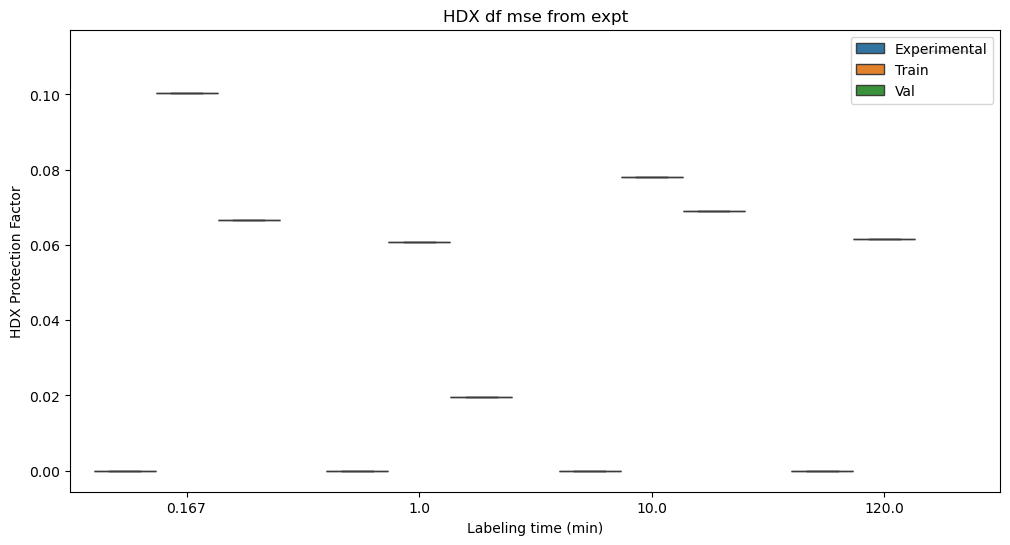

In [17]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [18]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange21_1706733043.pkl
Saving pickle dump_test_full0.5_celeste_stride100_413_5reps_bigEXPrange21.pickle


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:467: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings()
# settings.replicates = 3
# settings.gamma_range = (2,10)
# settings.train_frac = 0.8
# settings.RW_exponent = [0]
# settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name VDX already exists. Attempting to change name to VDX0
Experiment name VDX already exists. Attempting to change name to VDX1
Experiment name VDX already exists. Attempting to change name to VDX2
Experiment name VDX already exists. Attempting to change name to VDX3


In [ ]:
VDX = VDX.load_experiment(load_path='logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl')

Attempting to load experiment from:  logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl
Loading experiment from:  logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl


['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000        3  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092        4  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914        5  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000        6  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000        7  val_MD_Simulated_3

[164 rows x

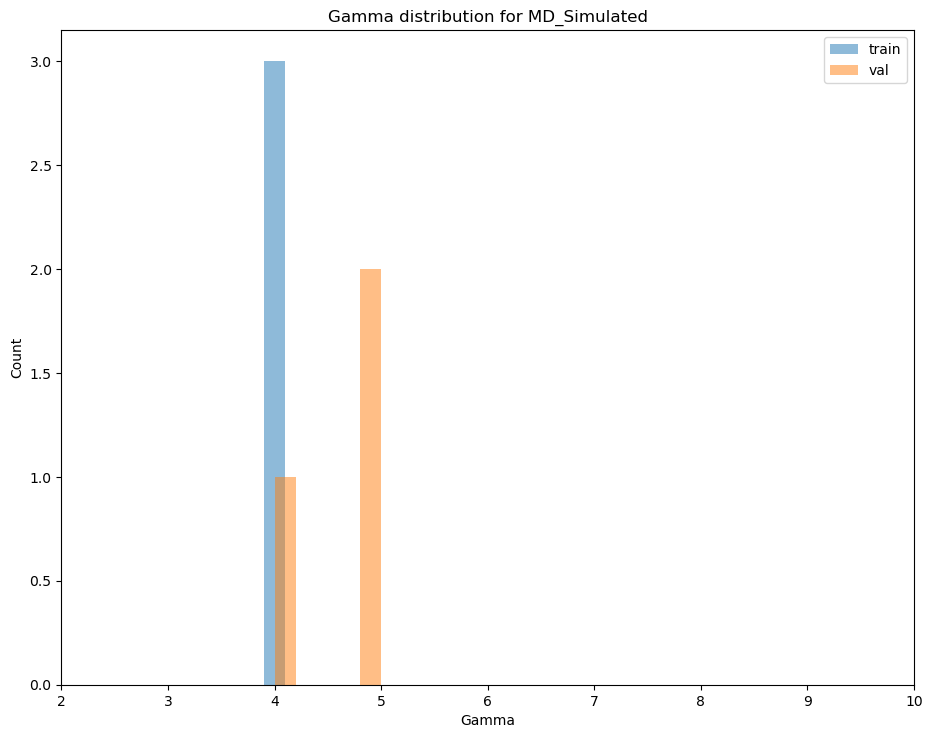

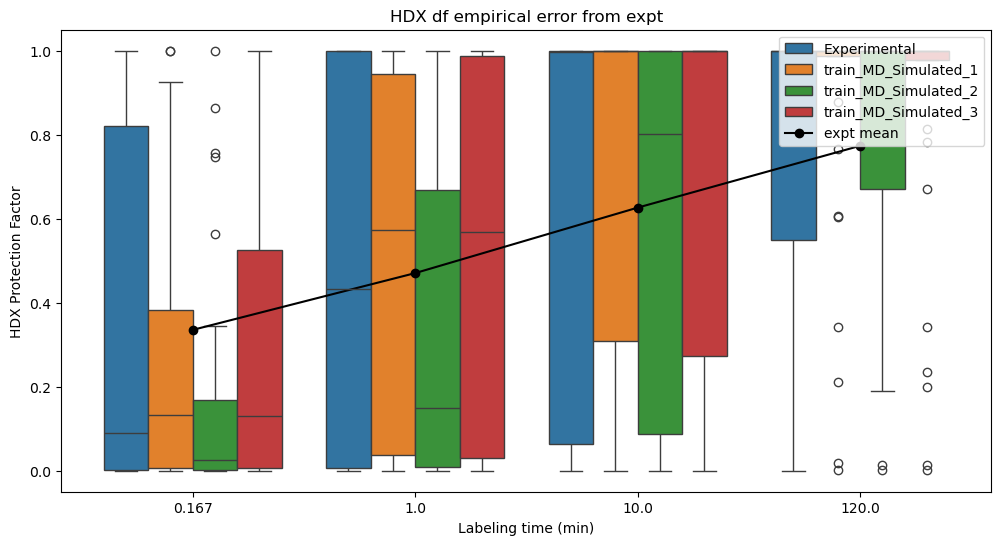

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000        3  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092        4  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914        5  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000        6  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000        7  val_MD_Simulated_3

[164 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

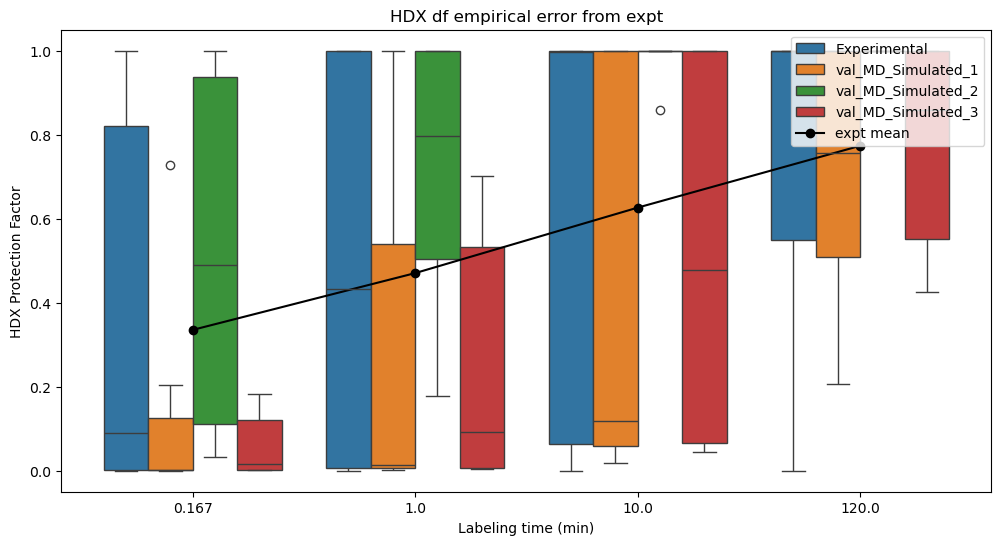

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
manual merge df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.

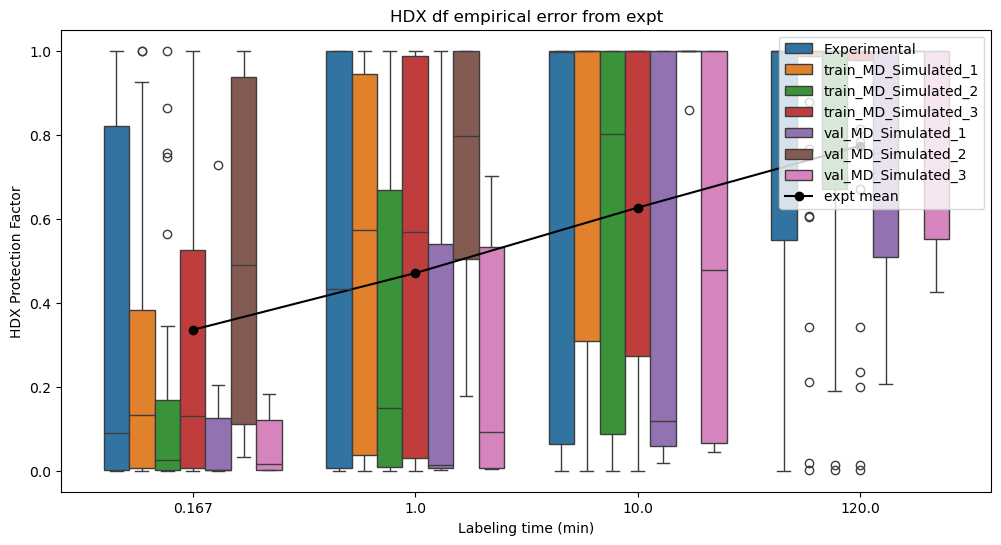

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000       23  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092       32  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914       35  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000       38  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000       40  val_MD_Simulated_3

[164 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


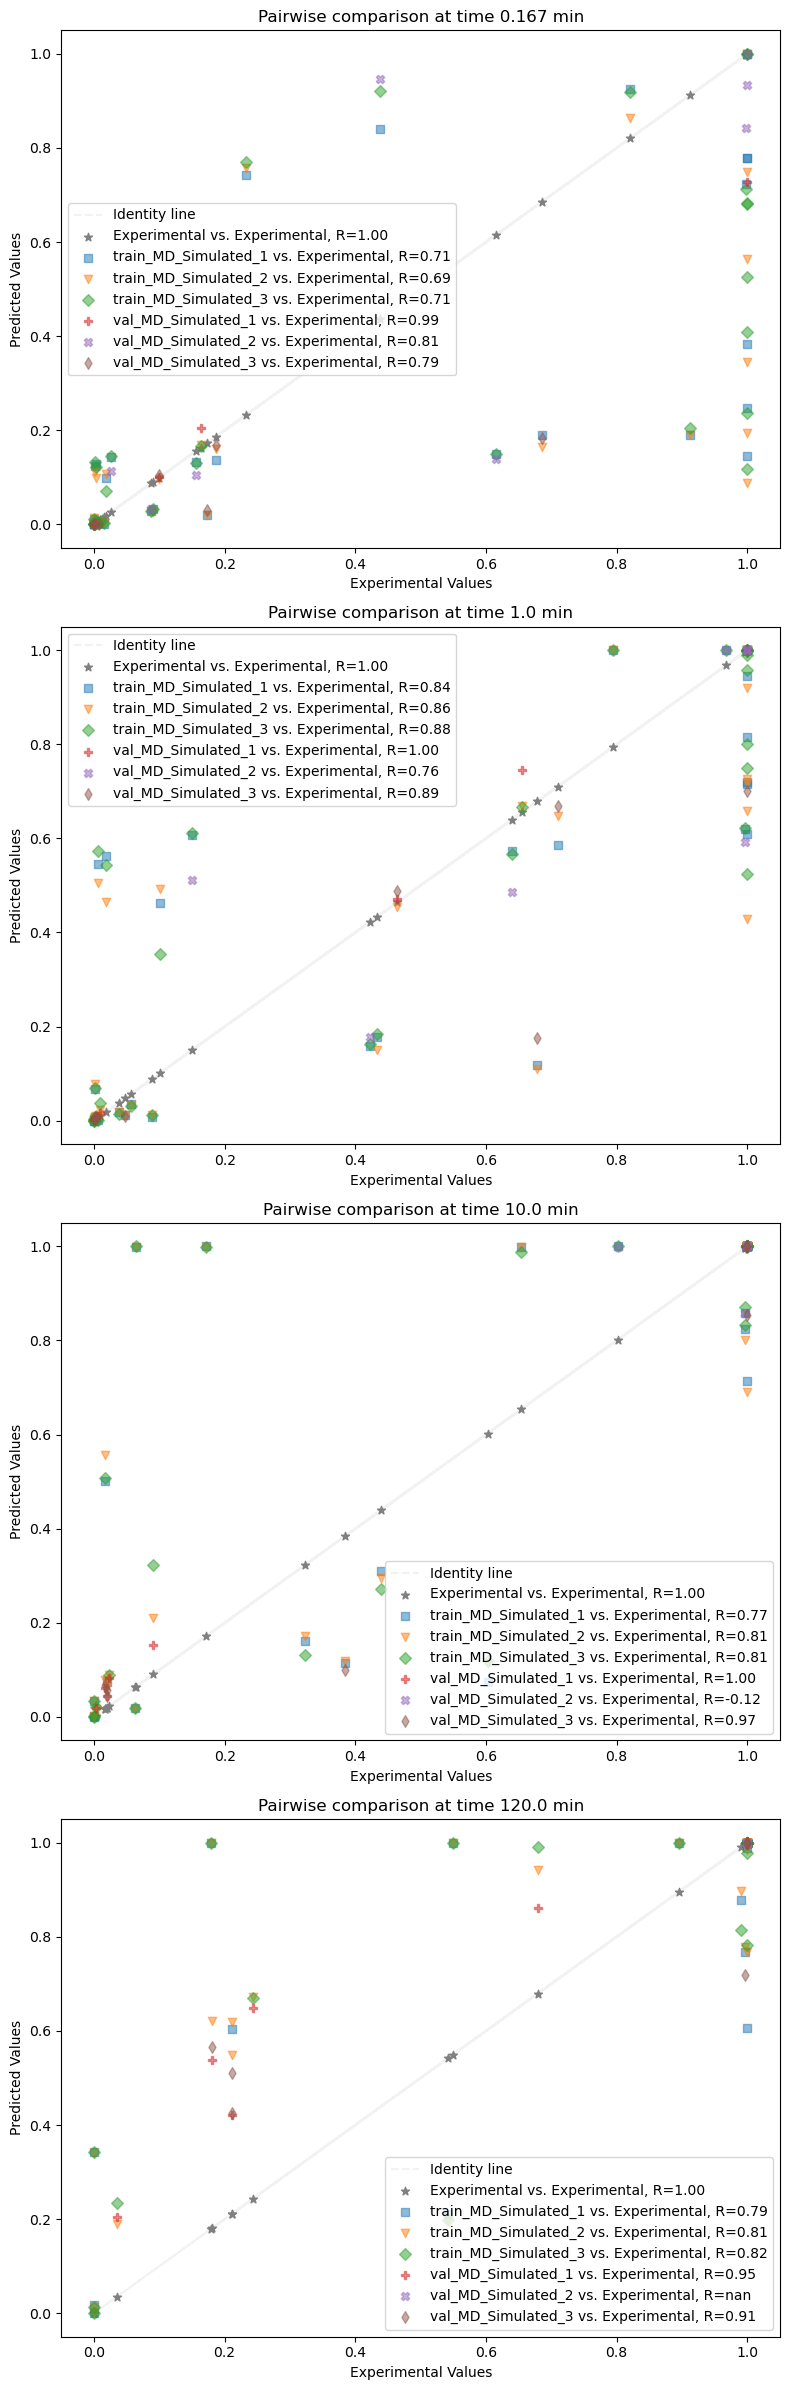

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000       23  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092       32  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914       35  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000       38  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000       40  val_MD_Simulated_3

[164 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFram

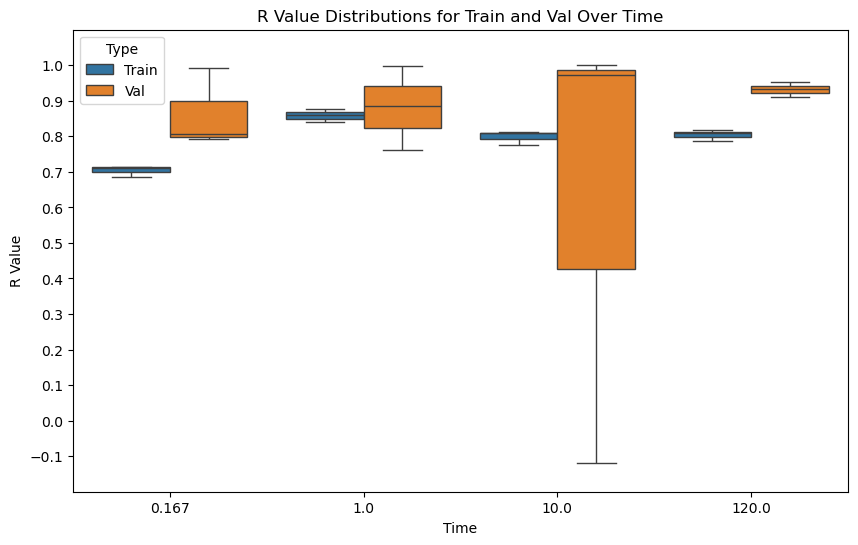

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
241  0.18270  0.70124  0.99999  1.00000       23    val_MD_Simulated_3
242  0.00099  0.00594  0.05786  0.51092       32    val_MD_Simulated_3
243  0.00177  0.01053  0.10042  0.71914       35    val_MD_Simulated_3
244  0.10567  0.48765  0.99875  1.00000       38    val_MD_Simulated_3
245  0.03174  0.17566  0.85510  1.00000       40    val_MD_Simulated_3

[246 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.0195

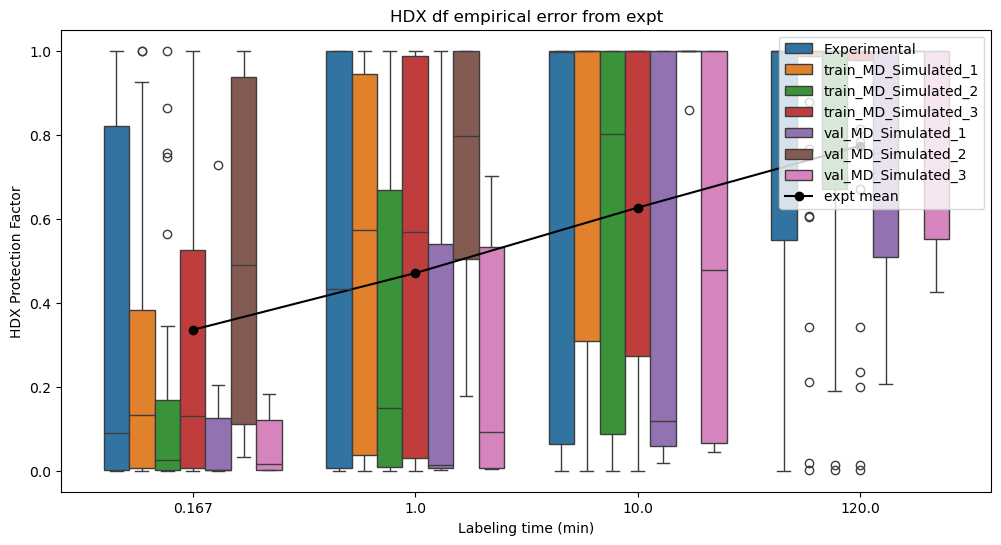

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
246  0.15669  0.63957  0.99996  1.000

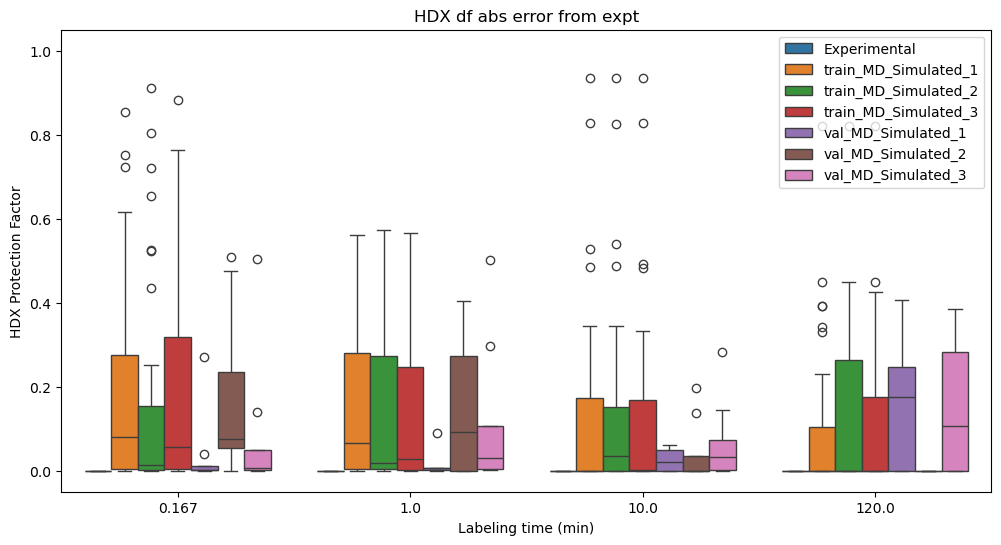

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
246  0.15669  0.63957  0.99996  1.000

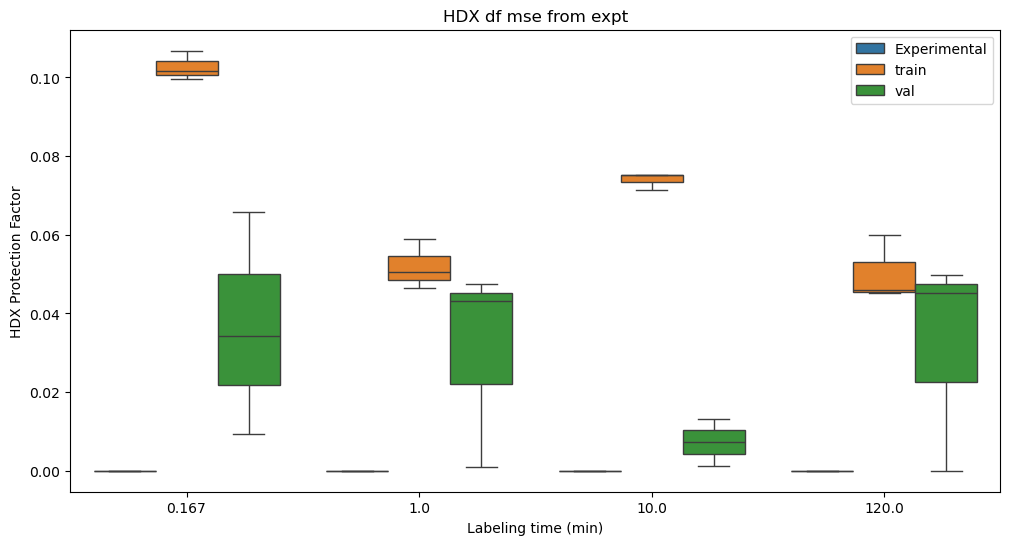

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


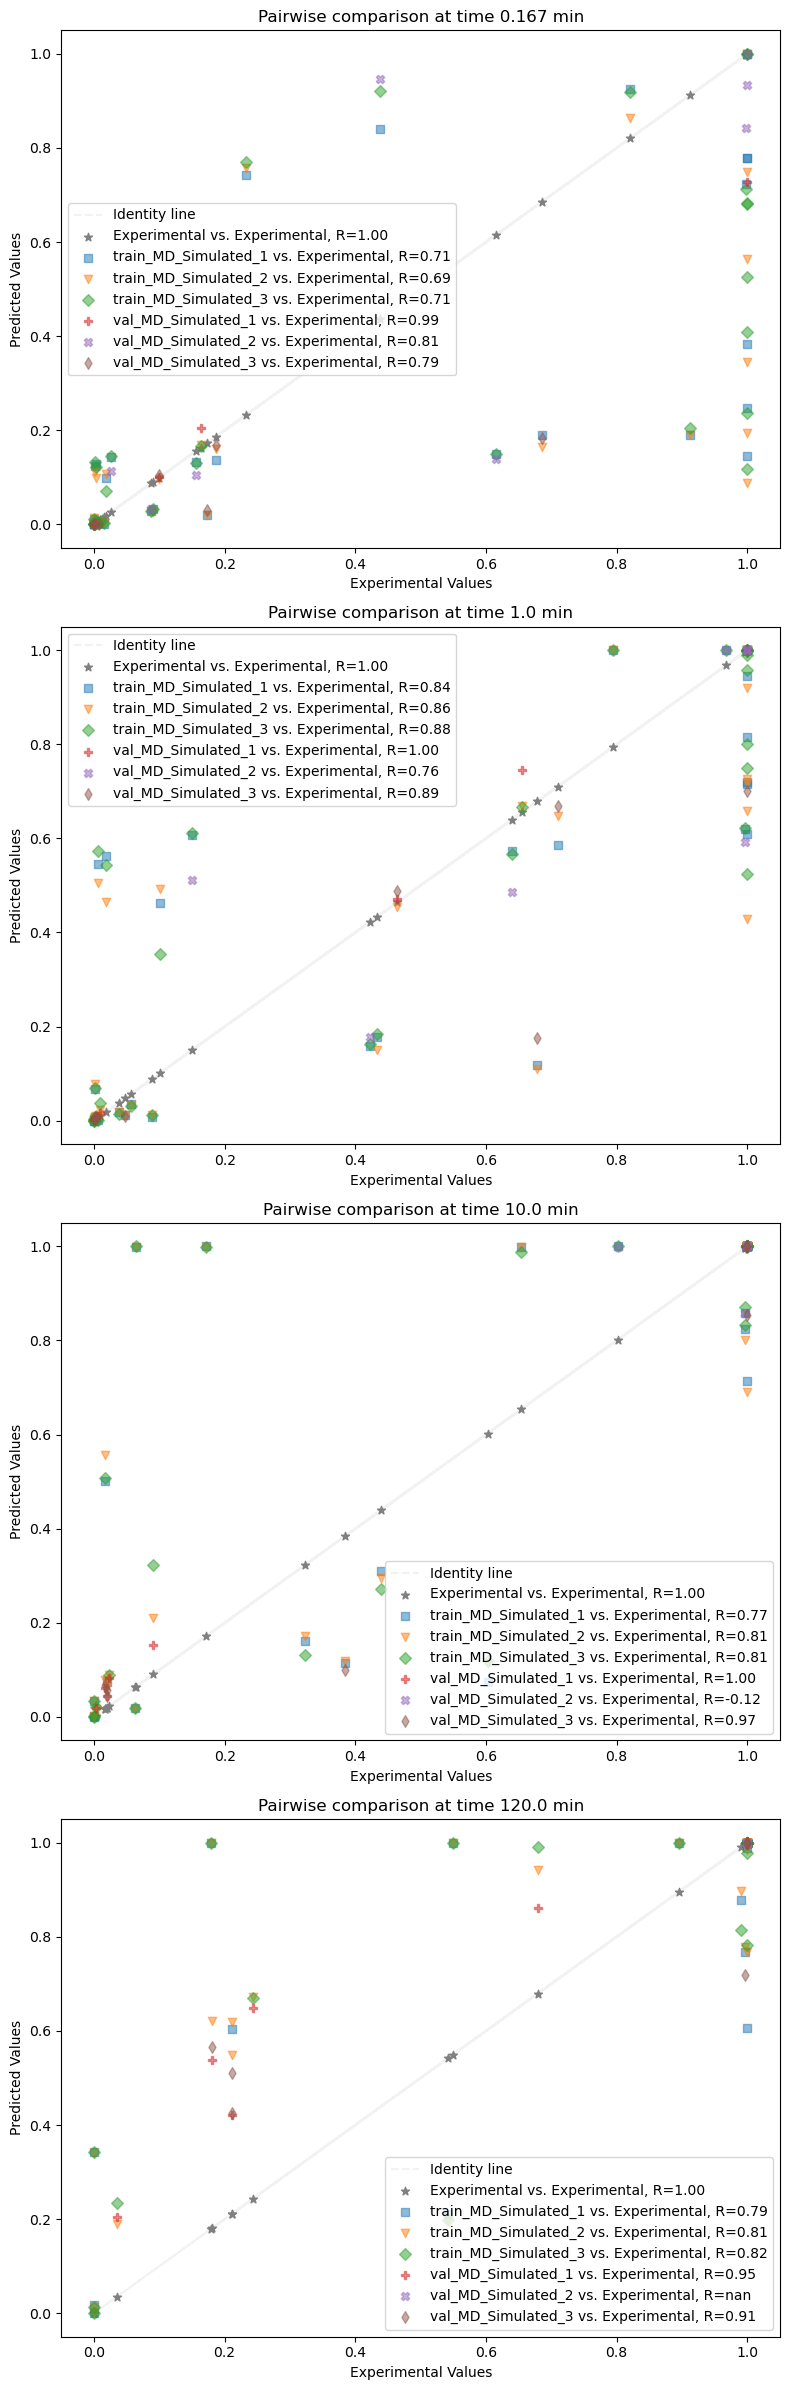

Train coverage: 100.00
Val coverage: 51.22
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
158  0.72819  0.99959  1.00000    1.0        7  val_MD_Simulated_avg
159  0.84287  0.99998  1.00000    1.0       30  val_MD_Simulated_avg
160  0.93436  1.00000  1.00000    1.0       27  val_MD_Simulated_avg
161  0.94627  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
162  0.99875  1.00000  1.00000    1.0        4  val_MD_Simulated_avg

[163 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0

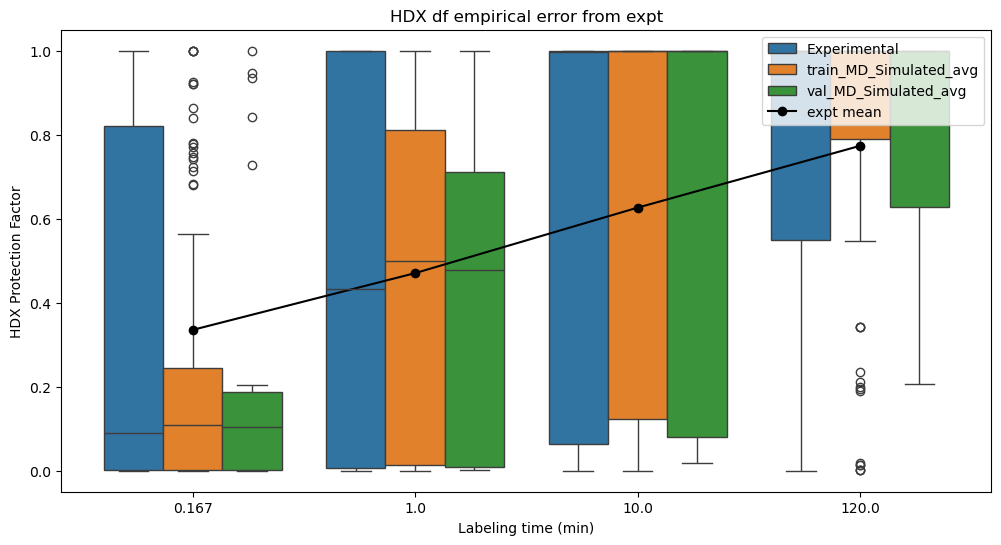

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
158  0.72819  0.99959  1.00000    1.0        7  val_MD_Simulated_avg
159  0.84287  0.99998  1.00000    1.0       30  val_MD_Simulated_avg
160  0.93436  1.00000  1.00000    1.0       27  val_MD_Simulated_avg
161  0.94627  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
162  0.99875  1.00000  1.00000    1.0        4  val_MD_Simulated_avg

[163 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

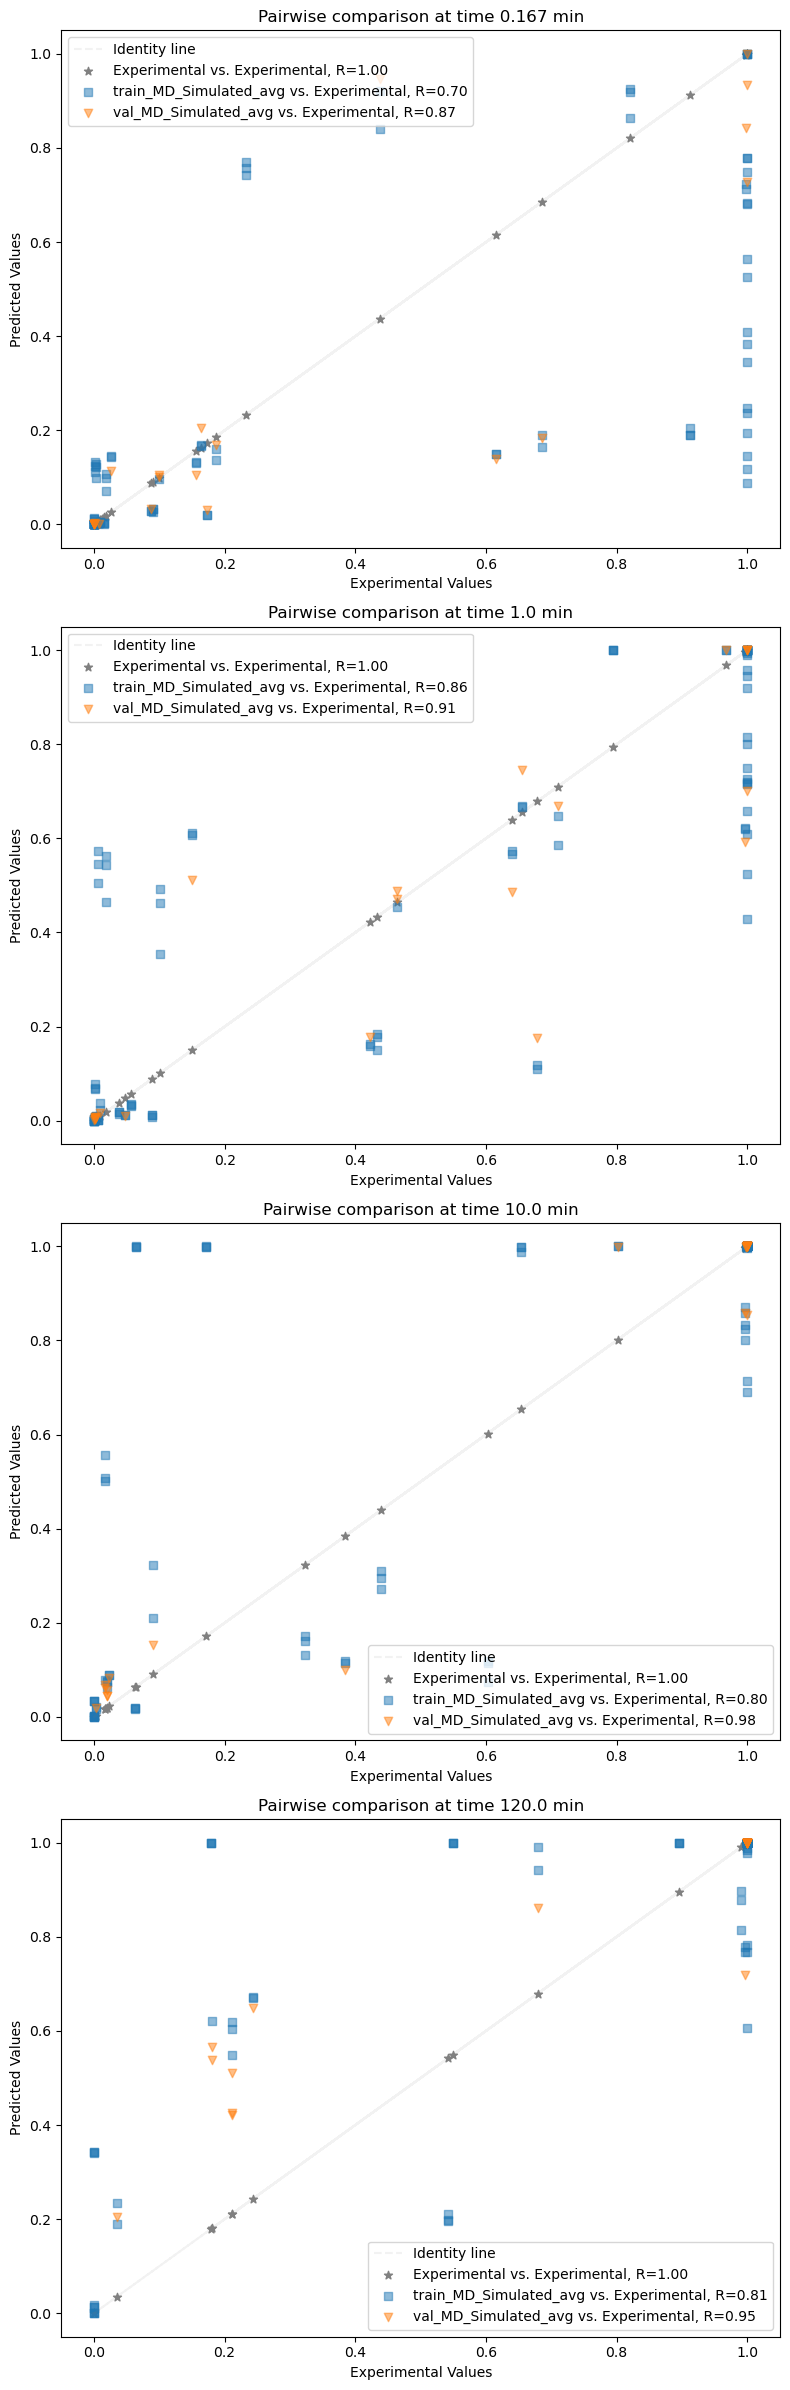

In [ ]:
with open('dump_test_full0.5_celeste_stride100_413_5reps_bigEXPrange6.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()